<center><h1 style="color:#173F8A;"> Cálculo Científico I, MAT2605, 2025-2 </h1></center>
<h3 style="color:#173F8A;text-align:left;"> Facultad de Matemáticas<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:left;"> Profesor: Manuel A. Sanchez<br> </h3>
<h4 style="color:#0176DE;text-align:left;"> Ayudantes: Tomás Malfetano (tomas.malfetano@uc.cl), Diego Vera (dva@uc.cl)<br> </h4>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="200" height="400"><br><br><br><br><br>
</figure>
 -->
<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

# Ayudantía 10

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Problema 1

Considere el siguiente polinomio

$$
f(x) = x^5 + x^4 - 9x^3 - x^2 + 20x - 12,
$$
con $5$ raices en $D = [-5, 5]$ (estas son $x_1 = -3$, $x_2 = -2$, $x_3 = 1$, $x_4 = 1$, $x_5 = 2$). Se quiere encontrar la mejor manera de estimar todas las raices del polinomio.

- Escriba explicitamente el método de newton para el problema $f(x) = 0$. Programe el método.
- Defina una malla uniforme sobre $D$ de puntos equiespaciados con distancia $h$ entre sí. Aplique newton para cada punto de la malla con un $h$ apropiado. Comente sus resultados.
- Recordando el Teorema de Horner, diseñe un algoritmo basado en el método de newton que encuentre todas las raices de un polinomio. Escriba un pseudocódigo y comente sobre como implementarlo.

In [30]:
def newton(f, df, x0, tol=1e-8, max_iter=50):
    # Inicializamos
    x = x0

    # Iteramos la cantidad de iteraciones que indicamos
    for i in range(max_iter):
        # Evaluamos la función y su derivada
        fx = f(x)
        dfx = df(x)

        # Verificamos que la derivada no sea muy cercana a 0
        if abs(dfx) < 1e-14:
            print("Derivada cercana a cero. Newton no es aplicable.")
            return None, None
        
        # Se actuliza la nueva solución
        x_new = x - fx / dfx

        # Si la iteración no presenta grandes cambios, termina la iteración.
        if abs(x_new - x) < tol:
            return x_new, i + 1
        
        # Se actualiza x para seguir con la siguiente iteración.
        x = x_new

In [31]:
def f(x):
    return x**5 + x**4 - 9*x**3 - x**2 + 20*x - 12

def df(x):
    return 5*x**4 + 4*x**3 - 27*x**2 - 2*x + 20

      x0  Iteraciones  Raíz encontrada
0   -5.0            9               -3
1   -4.9            9               -3
2   -4.8            8               -3
3   -4.7            8               -3
4   -4.6            8               -3
..   ...          ...              ...
96   4.6           10                2
97   4.7           10                2
98   4.8           11                2
99   4.9           11                2
100  5.0           11                2

[101 rows x 3 columns]


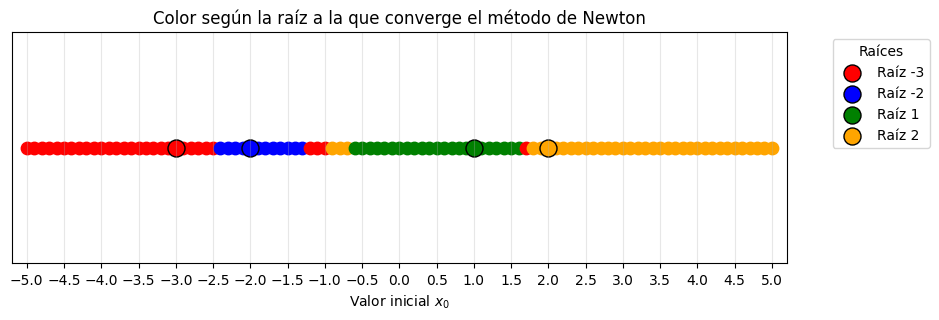

In [32]:
raices = np.array([-3, -2, 1, 2])

# h = 0.25
h = 0.1
valores_iniciales = np.arange(-5, 5+h, h)

data = []
for x0 in valores_iniciales:
    raiz, it = newton(f, df, x0)
    # Determinar a qué raíz converge (la más cercana)
    if raiz is None or np.isnan(raiz):
        r_label = "No converge"
    else:
        diffs = np.abs(raices - raiz)
        if diffs.min() < 1e-3:
            r_label = raices[np.argmin(diffs)]
        else:
            r_label = "Otra"
    data.append([x0, it, r_label])


# Tabla
df_table = pd.DataFrame(data, columns=["x0", "Iteraciones", "Raíz encontrada"])
print(df_table)

# Colores
colors = { -3: "red", -2: "blue", 1: "green", 2: "orange", "Otra": "gray", "No converge": "black" }

# Gráfico
plt.figure(figsize=(10, 3))
for _, row in df_table.iterrows():
    plt.scatter(row["x0"], 0, color=colors[row["Raíz encontrada"]], s=80)

# Etiquetas de las raíces sobre el eje x
for r, c in colors.items():
    if isinstance(r, (int, float)):  # solo las raíces numéricas
        plt.scatter(r, 0, color=c, s=150, edgecolor='k', label=f"Raíz {r}")


plt.xticks(np.arange(-5, 6, 0.5))   # marcas cada 0.5
plt.xlim(-5.2, 5.2)        
plt.yticks([])
plt.xlabel("Valor inicial $x_0$")
plt.title("Color según la raíz a la que converge el método de Newton")
plt.grid(True, alpha=0.3)
plt.legend(title="Raíces", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Extra

#### Fractales de Newton

Esta sección es una curiosidad que quería mostrarles, que muestra los patrones de convergencia del Método de Newton.

A continuación pueden encontrar una función que, dada una función $f(x)$ y su derivada, ejecuta el método de Newton para distintos puntos iniciales en el plano complejo y los va coloreando dependiendo de a qué raíz convergen. Considerando que se quiere resolver $f(x) = 0$.

Esto permite generar los denominados **Fractales de Newton**.

La siguiente celda de código está basada en el código de [Newton Fractal Python](https://scipython.com/book2/chapter-8-scipy/examples/the-newton-fractal/) recuperado 14/05/2024.

Muy recomendado revisar: [3Blue1Brown Newton Fractals](https://www.3blue1brown.com/lessons/newtons-fractal).

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['crimson', 'yellow', 'lime', 'turquoise', 'royalblue', 'mediumorchid', 'cyan', 'yellowgreen', 'magenta', 'deeppink', 'bisque']

TOL = 1.e-10

def newton(z0, f, fprime, MAX_IT=300):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-2, 2, -2, 2), printroot=False):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir


    nroots = len(roots)
    print(f'nroots = {nroots}')
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'prism'
        # cmap = plt.get_cmap('tab20c')
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
        

    plt.figure(figsize=(10, 10))
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    if printroot:
        for r in roots:
            ixr = 0
            iyr = 0
            distx = (xmax - xmin)**2
            disty = (ymax - ymin)**2
            for ix, x in enumerate(np.linspace(xmin, xmax, n)):
                aux_x = (x - np.real(r))**2
                if aux_x < distx:
                    distx = aux_x
                    ixr = ix
            for iy, y in enumerate(np.linspace(ymin, ymax, n)):
                aux_y = (y - np.imag(r))**2
                if aux_y < disty:
                    disty = aux_y
                    iyr = iy
            plt.scatter(ixr, iyr, s=50, c='black', marker='o')
    plt.show()

nroots = 5


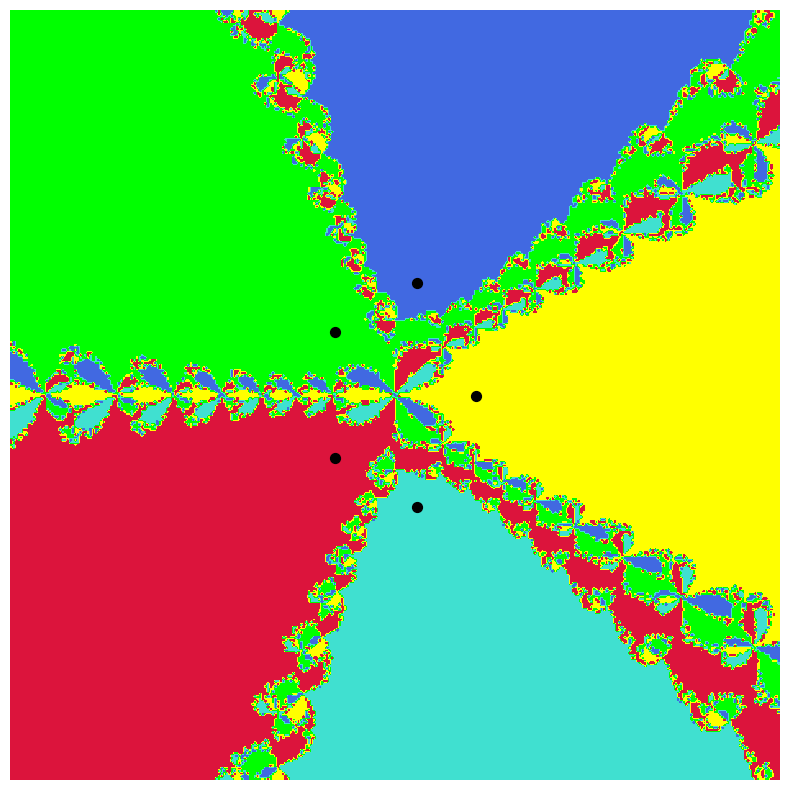

In [34]:
# Ejecutamos el Algoritmo

p = lambda z: z**5 + z**3 - 1
p_prime = lambda z: 5*z**4 + 3*z**2

f = lambda z: p(z)
fprime = lambda z: p_prime(z)


# p = lambda z: z**5 + z**3 - 1
# p_prime = lambda z: 5*z**4 + 3*z**2

# f = lambda z: p(z)*np.cos(z)
# fprime = lambda z: p_prime(z)*np.cos(z) - p(z)*np.sin(z)



plot_newton_fractal(f, fprime, n=300, domain=(-4, 4, -4, 4), printroot=True) # n es el numero de pixeles por eje

nroots = 5


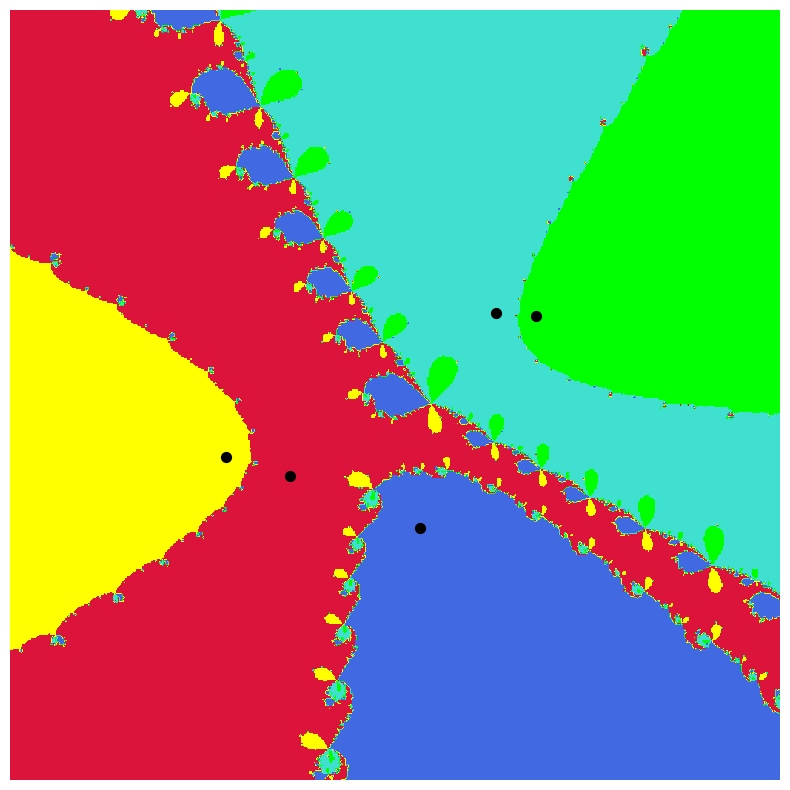

nroots = 5


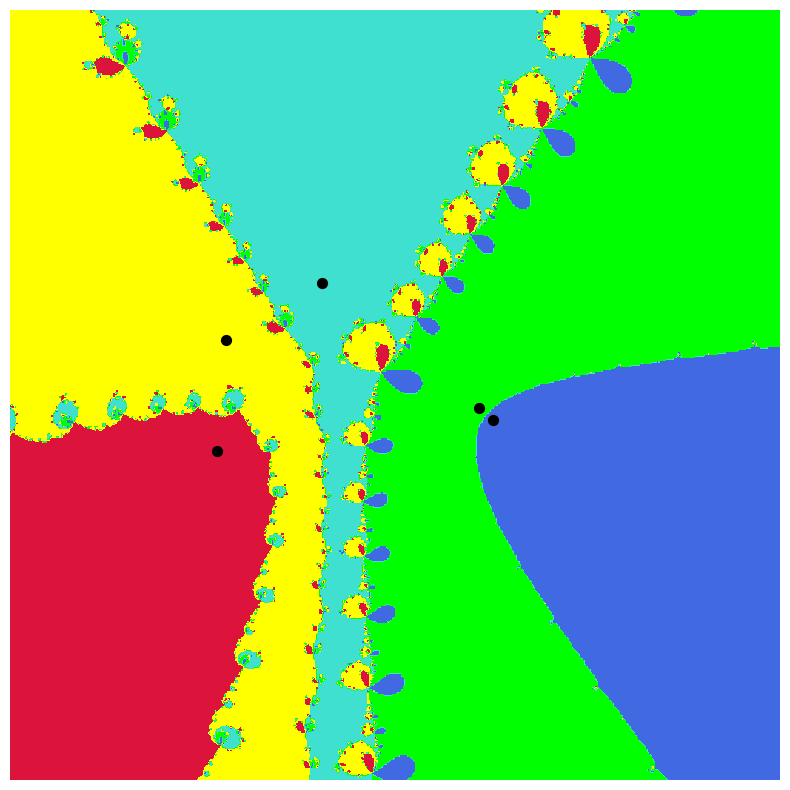

nroots = 5


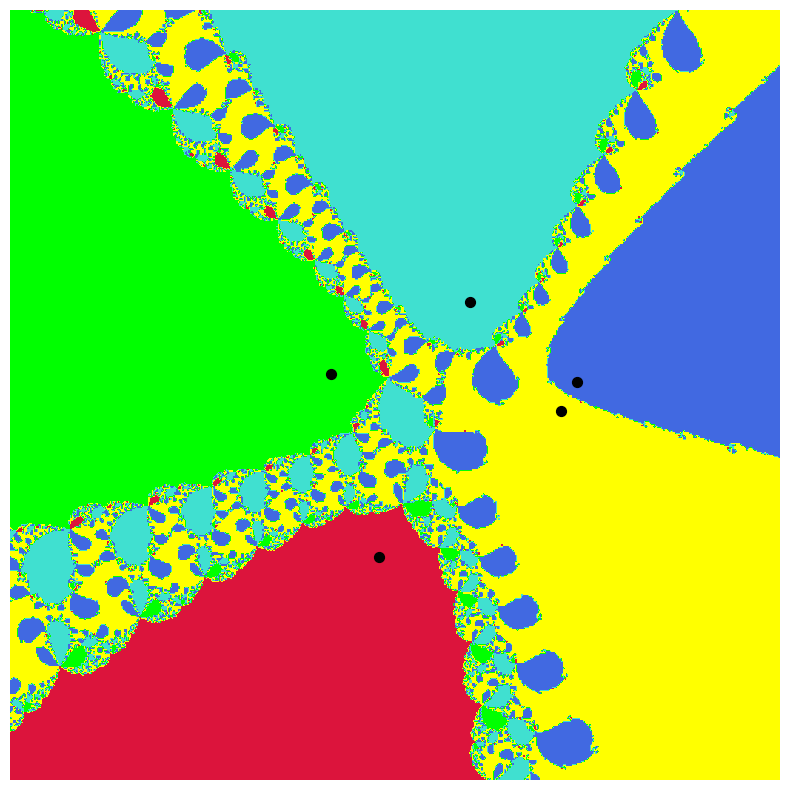

In [35]:
for i in range(3):

    r = np.sqrt(np.random.rand(5))       # random radius in [0, 1)
    theta = 2 * np.pi * np.random.rand(5)  # random angle in [0, 2π)
    roots = 2*r * np.exp(1j * theta)

    p = np.poly(roots)
    dp = np.polyder(p)


    f = lambda z: np.polyval(p, z)
    fprime = lambda z: np.polyval(dp, z)

    plot_newton_fractal(f, fprime, n=500, domain=(-4, 4, -4, 4), printroot=True) # n es el numero de pixeles por eje

## Parte c

In [38]:
def pol(coef_list, x):
    val = 0
    n = len(coef_list) - 1

    for i, a in enumerate(coef_list):
        val += a*x**(i)
    
    return val


def der_pol(coef_list, x):
    val = 0
    n = len(coef_list) - 1

    for i, a in enumerate(coef_list):
        val += i*a*x**(i -1)
    
    return val


print(pol([3, 5, 1], 1))

9


## Problema 2

Considere el sistema no lineal:

$$
\begin{cases}
5x^2 - y^2 = 0, \\[4pt]
\dfrac{1}{4}\big(\sin(x) + \cos(y)\big) - y = 0.
\end{cases}
$$

Determine cómo resolverlo mediante **iteración de Punto Fijo**. Para esto, considere la región $D = [0,1]\times [0,1]$ y encuentre una función $G$ a la cual se le buscará su punto fijo en $D$. Luego, verifique que esta función tenga un único punto fijo en la región anterior con respecto a la norma $ \| \cdot \|_\infty $. 


## Problema 3

Para los sistemas de ecuaciones no lineales dados a continuación, verifique si es aplicable el método de Newton 
y escriba el algoritmo para cada caso. Luego, si es posible, realice dos iteraciones con los valores iniciales 
indicados abajo.

**(a)**  
$$
\begin{cases}
x^2 - y = 0,\\
y^2 = 0,
\end{cases}
\quad \text{utilice el valor inicial } 
\mathbf{x}_0 = (1,1)^T.
$$

**(b)**  
$$\begin{cases}
\sin(4\pi xy) - x - 2y = 0,\\[4pt]
\left(\dfrac{4\pi - 1}{4\pi}\right)\!\big(e^{2x} - e\big) + 4e\,y^2 - 2ex = 0,
\end{cases}
\quad \text{utilice el valor inicial } 
\mathbf{x}_0 = (0,0)^T.
$$

**(c)**  
$$
\begin{cases}
5x^2 - y^2 = 0,\\[4pt]
\dfrac{1}{4}\big(\sin(x) + \cos(y)\big) - y = 0,
\end{cases}
\quad \text{utilice el valor inicial } 
\mathbf{x}_0 = (0,0)^T.
$$